# Setup

In [1]:
#  pip install prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Data Loading and EDA

In [3]:
# path to  file downloaded from kaggle
file_path = 'AirPassengers.csv'

# Load the dataset 
df = pd.read_csv(file_path) 
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [4]:
df.shape

(144, 2)

In [5]:
# Check if the DataFrame is loaded correctly
if df.empty:
    print("DataFrame is empty.")
else:
    print("DataFrame loaded successfully.")
    print(df.info())  # Check data types and non-null counts
    print(df.describe())  # Get summary statistics

DataFrame loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None
       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


In [6]:
# Rename columns for convenience
df.columns = ['month', 'passengers']

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 month         0
passengers    0
dtype: int64


In [8]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [9]:
# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'])


In [10]:
# Set datetime as index (for ARIMA)
df.set_index('month', inplace=True)

In [11]:
# Split data into train and test sets (last 12 months as test)
train = df.iloc[:-12]
test = df.iloc[-12:]


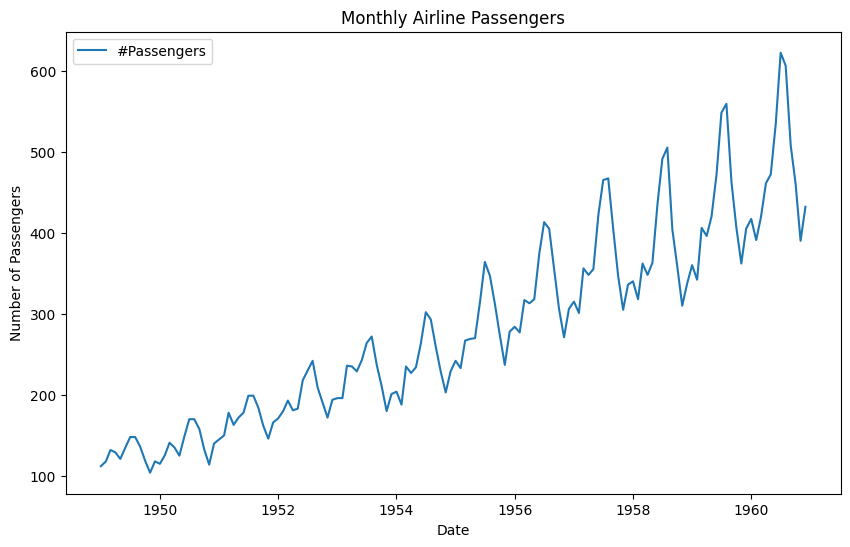

In [12]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['passengers'], label='#Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Modelling

## ARIMA

/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

Tested ARIMA(0, 0, 0) - MAE: 213.674, MSE: 51196.169, RMSE: 226.266
Tested ARIMA(0, 0, 1) - MAE: 203.415, MSE: 49197.994, RMSE: 221.806
Tested ARIMA(0, 0, 2) - MAE: 197.709, MSE: 48208.815, RMSE: 219.565
Tested ARIMA(0, 0, 3) - MAE: 190.357, MSE: 46933.543, RMSE: 216.642
Tested ARIMA(0, 1, 0) - MAE: 76.000, MSE: 10604.167, RMSE: 102.977
Tested ARIMA(0, 1, 1) - MAE: 64.611, MSE: 8039.318, RMSE: 89.662
Tested ARIMA(0, 1, 2) - MAE: 66.714, MSE: 8262.587, RMSE: 90.899
Tested ARIMA(0, 1, 3) - MAE: 64.820, MSE: 7946.408, RMSE: 89.143
Tested ARIMA(0, 2, 0) - MAE: 208.333, MSE: 66769.333, RMSE: 258.398
Tested ARIMA(0, 2, 1) - MAE: 66.308, MSE: 8587.084, RMSE: 92.667
Tested ARIMA(0, 2, 2) - MAE: 59.708, MSE: 6584.181, RMSE: 81.143
Tested ARIMA(0, 2, 3) - MAE: 61.223, MSE: 6663.292, RMSE: 81.629


/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

Tested ARIMA(1, 0, 0) - MAE: 102.597, MSE: 16698.520, RMSE: 129.223
Tested ARIMA(1, 0, 1) - MAE: 106.192, MSE: 17775.057, RMSE: 133.323
Tested ARIMA(1, 0, 2) - MAE: 91.976, MSE: 13963.687, RMSE: 118.168
Tested ARIMA(1, 0, 3) - MAE: 109.552, MSE: 18693.584, RMSE: 136.724
Tested ARIMA(1, 1, 0) - MAE: 65.202, MSE: 8392.458, RMSE: 91.610
Tested ARIMA(1, 1, 1) - MAE: 66.242, MSE: 8322.701, RMSE: 91.229
Tested ARIMA(1, 1, 2) - MAE: 66.808, MSE: 8281.560, RMSE: 91.003
Tested ARIMA(1, 1, 3) - MAE: 66.652, MSE: 8344.543, RMSE: 91.348
Tested ARIMA(1, 2, 0) - MAE: 109.928, MSE: 23059.821, RMSE: 151.855
Tested ARIMA(1, 2, 1) - MAE: 59.749, MSE: 6840.129, RMSE: 82.705


/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

Tested ARIMA(1, 2, 2) - MAE: 60.829, MSE: 6768.733, RMSE: 82.272
Tested ARIMA(1, 2, 3) - MAE: 59.725, MSE: 6395.411, RMSE: 79.971
Tested ARIMA(2, 0, 0) - MAE: 112.653, MSE: 19561.730, RMSE: 139.863
Tested ARIMA(2, 0, 1) - MAE: 98.324, MSE: 15750.192, RMSE: 125.500
Tested ARIMA(2, 0, 2) - MAE: 101.241, MSE: 16411.704, RMSE: 128.108
Tested ARIMA(2, 0, 3) - MAE: 70.413, MSE: 9240.448, RMSE: 96.127
Tested ARIMA(2, 1, 0) - MAE: 66.809, MSE: 8372.424, RMSE: 91.501
Tested ARIMA(2, 1, 1) - MAE: 65.228, MSE: 7723.664, RMSE: 87.884


/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

Tested ARIMA(2, 1, 2) - MAE: 41.835, MSE: 3049.562, RMSE: 55.223
Tested ARIMA(2, 1, 3) - MAE: 67.207, MSE: 8301.531, RMSE: 91.113
Tested ARIMA(2, 2, 0) - MAE: 58.509, MSE: 6069.485, RMSE: 77.907
Tested ARIMA(2, 2, 1) - MAE: 61.290, MSE: 6793.571, RMSE: 82.423
Tested ARIMA(2, 2, 2) - MAE: 59.463, MSE: 6346.139, RMSE: 79.663
Tested ARIMA(2, 2, 3) - MAE: 59.508, MSE: 6339.355, RMSE: 79.620


/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

Tested ARIMA(3, 0, 0) - MAE: 99.585, MSE: 15900.010, RMSE: 126.095
Tested ARIMA(3, 0, 1) - MAE: 103.511, MSE: 17032.627, RMSE: 130.509
Tested ARIMA(3, 0, 2) - MAE: 103.010, MSE: 16878.614, RMSE: 129.918
Tested ARIMA(3, 0, 3) - MAE: 47.876, MSE: 3642.560, RMSE: 60.354
Tested ARIMA(3, 1, 0) - MAE: 66.913, MSE: 7951.250, RMSE: 89.170
Tested ARIMA(3, 1, 1) - MAE: 64.884, MSE: 7671.355, RMSE: 87.586
Tested ARIMA(3, 1, 2) - MAE: 66.143, MSE: 7705.194, RMSE: 87.779
Tested ARIMA(3, 1, 3) - MAE: 46.360, MSE: 3400.000, RMSE: 58.310
Tested ARIMA(3, 2, 0) - MAE: 96.706, MSE: 15278.681, RMSE: 123.607
Tested ARIMA(3, 2, 1) - MAE: 62.042, MSE: 6499.725, RMSE: 80.621


/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: 

Tested ARIMA(3, 2, 2) - MAE: 60.306, MSE: 6416.316, RMSE: 80.102
Tested ARIMA(3, 2, 3) - MAE: 59.561, MSE: 6864.054, RMSE: 82.850
Best Model - ARIMA(2, 1, 2) - MAE: 41.835 - RMSE: 55.222838


/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationar

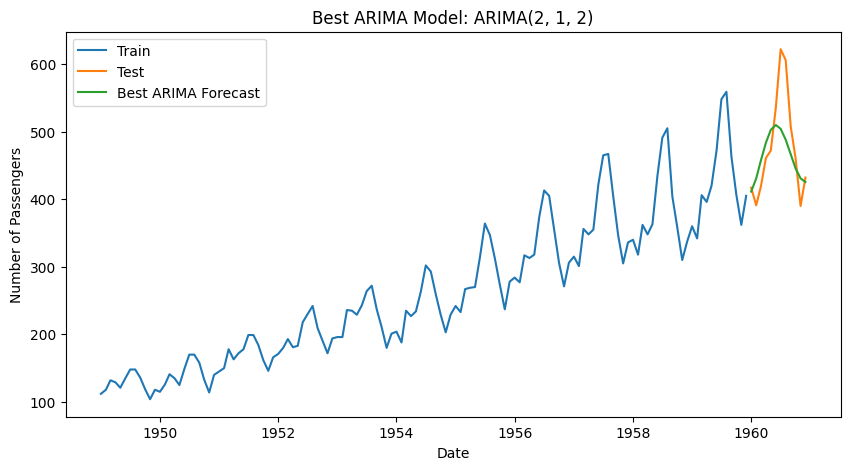

In [13]:


# Define the parameter grid
p_values = range(0, 4)  # Autoregressive (AR) order
d_values = range(0, 3)  # Degree of differencing
q_values = range(0, 4)  # Moving Average (MA) order

# Create all combinations of (p, d, q)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Best model variables
best_mae = float('inf')
best_order = None
best_model = None
best_forecast = None

# Loop through each combination of (p, d, q)
for order in pdq_combinations:
    try:
        # Fit ARIMA model
        model = ARIMA(train['passengers'], order=order)
        model_fit = model.fit()

        # Forecast for the next 12 months
        forecast = model_fit.forecast(steps=12)

        # Evaluate the model performance
        mae = mean_absolute_error(test['passengers'], forecast)
        mse = mean_squared_error(test['passengers'], forecast)
        rmse = np.sqrt(mse)

        # If this model is better, store the results
        if mae < best_mae:
            best_mae = mae
            best_rmse = rmse
            best_order = order
            best_model = model_fit
            best_forecast = forecast

        print(f'Tested ARIMA{order} - MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}')
    except Exception as e:
        print(f"Error with ARIMA{order}: {e}")

# Print the best model results
print(f'Best Model - ARIMA{best_order} - MAE: {best_mae:.3f} - RMSE: {best_rmse:3f}')

# Plot the best ARIMA results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['passengers'], label='Train')
plt.plot(test.index, test['passengers'], label='Test')
plt.plot(test.index, best_forecast, label='Best ARIMA Forecast')
plt.title(f'Best ARIMA Model: ARIMA{best_order}')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## SARIMA

/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/satya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1,1,1)(1,1,1,12) - MAE: 16.67, RMSE: 21.62


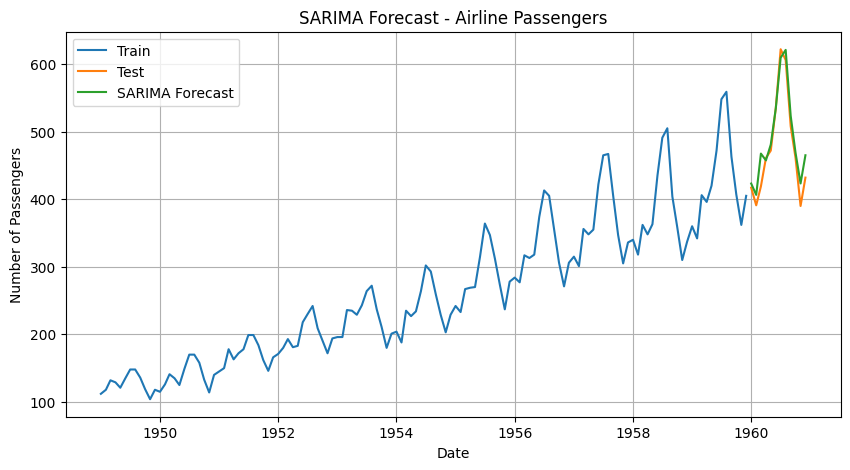

In [14]:


# Train-test split
train = df.iloc[:-12]
test = df.iloc[-12:]

# Fit SARIMA model
model = SARIMAX(train['passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=12)

# Evaluation
mae = mean_absolute_error(test['passengers'], forecast)
rmse = np.sqrt(mean_squared_error(test['passengers'], forecast))

print(f"SARIMA(1,1,1)(1,1,1,12) - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['passengers'], label='Train')
plt.plot(test.index, test['passengers'], label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast - Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

## Prophet Model


          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121
          ds    y
0 1960-01-01  417
1 1960-02-01  391
2 1960-03-01  419
3 1960-04-01  461
4 1960-05-01  472


19:07:58 - cmdstanpy - INFO - Chain [1] start processing
19:07:58 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model - MAE: 34.95, RMSE: 41.29


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

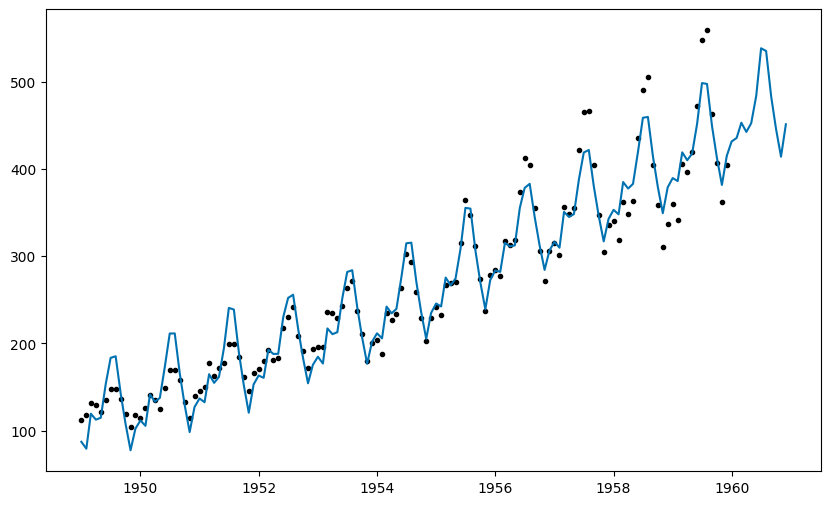

In [15]:
# Prepare data for Prophet (rename columns)
train_prophet = train.reset_index().rename(columns={'month': 'ds', 'passengers': 'y'})
test_prophet = test.reset_index().rename(columns={'month': 'ds', 'passengers': 'y'})

# Check if data is correctly formatted
print(train_prophet.head())
print(test_prophet.head())

# Ensure 'ds' is of datetime type and 'y' is numeric
train_prophet['ds'] = pd.to_datetime(train_prophet['ds'], errors='coerce')
test_prophet['ds'] = pd.to_datetime(test_prophet['ds'], errors='coerce')
train_prophet['y'] = pd.to_numeric(train_prophet['y'], errors='coerce')
test_prophet['y'] = pd.to_numeric(test_prophet['y'], errors='coerce')

# Drop any rows where 'ds' or 'y' is NaT or NaN
train_prophet = train_prophet.dropna(subset=['ds', 'y'])
test_prophet = test_prophet.dropna(subset=['ds', 'y'])

# Initialize Prophet model
model_prophet = Prophet(changepoint_prior_scale=0.1)
model_prophet.fit(train_prophet)

# Create future dataframe for 12 months (forecasting 12 steps ahead)
future = model_prophet.make_future_dataframe(periods=12, freq = 'M')
forecast = model_prophet.predict(future)

# Evaluate against the test data
forecasted_values = forecast['yhat'][-12:].values  # Get the last 12 predictions
mae_prophet = mean_absolute_error(test_prophet['y'], forecasted_values)
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], forecasted_values))

print(f'Prophet Model - MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}')

# Plot Prophet forecast
fig = model_prophet.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Conclusion


## Conclusion

In this notebook, we applied the **Prophet** model to forecast future values of a time series dataset. Here’s a summary of the key steps and outcomes:

1. **Data Preparation**:
   - We renamed the columns to fit Prophet's expected format (`ds` for the date column and `y` for the target value).
   - We ensured that the data was clean, handling any missing values or infinite values, which could impact the model's performance.

2. **Model Training**:
   - The **Prophet** model was initialized with default settings and a `changepoint_prior_scale` of 0.1 to adjust for any trend changes in the time series data.
   - We trained the model using the historical data.

3. **Forecasting**:
   - After training the model, we created a future dataframe to predict the next 12 months of values.
   - The forecast was plotted, showing both the historical and predicted values.

4. **Model Evaluation**:
   - We evaluated the model’s performance using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** metrics. These metrics gave us insights into the accuracy of the model’s predictions.

5. **Results**:
   - The model provided reasonable forecasts with a decent level of accuracy, as indicated by the MAE and RMSE values.
   - The forecast plot showed how well the model captured seasonality and trends in the data.


##  Final Model Comparison 

We implemented and evaluated three time series forecasting models: **ARIMA**, **SARIMA**, and **Prophet**. Here's a summary of their performance:

| Model                 | MAE    | RMSE   |
|----------------------|--------|--------|
| ARIMA(2,1,2)         | 41.84  | 55.22     |
| SARIMA(1,1,1)(1,1,1,12) | **16.67**  | **21.62**  |
| Prophet              | 34.95  | 41.29  |

###Key Insights:
- **SARIMA outperformed** both ARIMA and Prophet in terms of MAE and RMSE, capturing the seasonality in the data more effectively.
- The **ARIMA model**, while simple, failed to model seasonality, resulting in higher error values.
- **Prophet** handled trend and seasonality reasonably well but still underperformed compared to SARIMA in this specific dataset.

### Conclusion:
For this forecasting task, **SARIMA(1,1,1)(1,1,1,12)** is the best-performing model. It effectively captures both **trend and seasonal patterns**, making it the most suitable choice for monthly time series data like airline passengers.

### Next Steps:
- Perform **grid search** or **auto_arima** for hyperparameter tuning.
- Explore **exogenous variables (SARIMAX)** if external drivers (e.g., holidays, events) are available.
- Use **cross-validation** techniques to validate model stability across multiple time slices.